#Introduction

---
Batch 006 - Hana Rifdah Sakinah


In [ ]:
!pip install feature-engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import *
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

     |████████████████████████████████| 180 kB 8.5 MB/s 
     |████████████████████████████████| 9.8 MB 47.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


#Data Loading

---



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hacktiv8/Dataset/rideshare_kaggle.csv')
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,15436653

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [ ]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.0,1.544046e+09,689192.492586,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,693071.0,1.161914e+01,6.948114,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,693071.0,1.779436e+01,9.982286,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,693071.0,1.158668e+01,0.492429,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,693071.0,2.189430e+00,1.138937,2.000000e-02,1.280000e+00,2.160000e+00,2.920000e+00,7.860000e+00
surge_multiplier,693071.0,1.013870e+00,0.091641,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,693071.0,4.233817e+01,0.047840,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,693071.0,-7.106615e+01,0.020302,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,693071.0,3.958439e+01,6.726084,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.timezone.unique()

array(['America/New_York'], dtype=object)

In [ ]:
df.product_id.unique()

array(['lyft_line', 'lyft_premier', 'lyft', 'lyft_luxsuv', 'lyft_plus',
       'lyft_lux', '6f72dfc5-27f1-42e8-84db-ccc7a75f6969',
       '6c84fd89-3f11-4782-9b50-97c468b19529',
       '55c66225-fbe7-4fd5-9072-eab1ece5e23e',
       '9a0e7b09-b92b-4c41-9779-2ad22b4d779d',
       '6d318bcc-22a3-4af6-bddd-b409bfce1546',
       '997acbb5-e102-41e1-b155-9df7de0a73f2',
       '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a'], dtype=object)

In [ ]:
df.name.unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

#EDA

---



In [ ]:
df.shape

(693071, 57)

In [ ]:
df.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

In [ ]:
df.isnull().sum() / df.shape[0] * 100

id                             0.000000
timestamp                      0.000000
hour                           0.000000
day                            0.000000
month                          0.000000
datetime                       0.000000
timezone                       0.000000
source                         0.000000
destination                    0.000000
cab_type                       0.000000
product_id                     0.000000
name                           0.000000
price                          7.949402
distance                       0.000000
surge_multiplier               0.000000
latitude                       0.000000
longitude                      0.000000
temperature                    0.000000
apparentTemperature            0.000000
short_summary                  0.000000
long_summary                   0.000000
precipIntensity                0.000000
precipProbability              0.000000
humidity                       0.000000
windSpeed                      0.000000


**Which total ride is higher?**

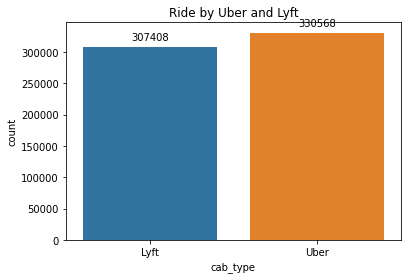

In [ ]:

plt.title('Ride by Uber and Lyft')

fig = sns.countplot(x=df['cab_type'])

for p in fig.patches:
  fig.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()


As we can see, Uber has slightly more total ride than Lyft. Uber has 330,568 rides and Lyft has 307,408 rides

**Number of uber and lyft rides by type of service**

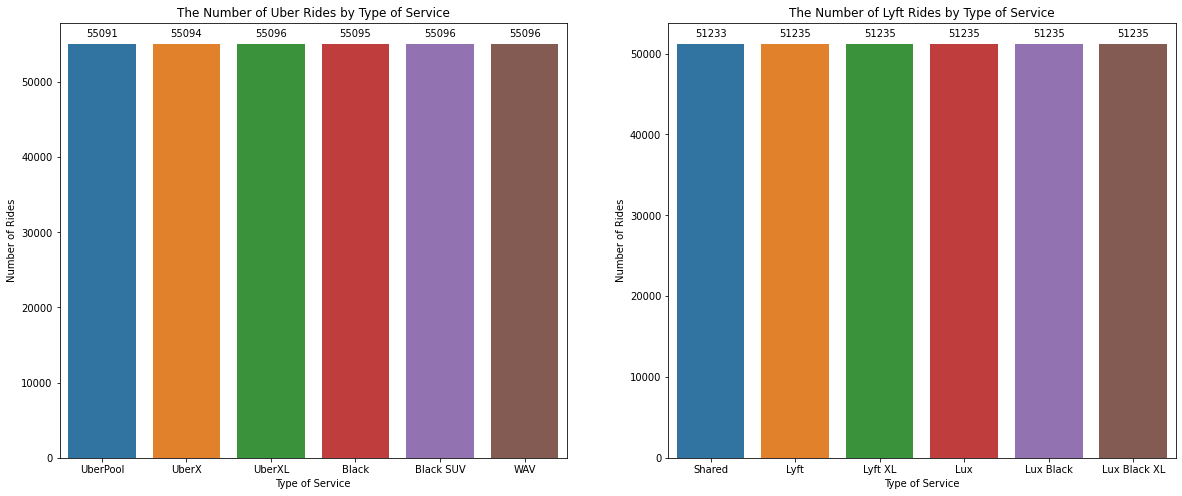

In [ ]:
# The Average price of rides by type of service

uber_order =[ 'UberPool', 'UberX', 'UberXL', 'Black','Black SUV','WAV' ]
lyft_order = ['Shared', 'Lyft', 'Lyft XL', 'Lux', 'Lux Black', 'Lux Black XL']

fig, ax = plt.subplots(1,2, figsize = (20,8))

ax1 = sns.barplot(x = df[df['cab_type'] == 'Uber'].groupby('name').name.count().index, y = df[df['cab_type'] == 'Uber'].groupby('name').name.count(), ax = ax[0] ,order = uber_order)
ax2 = sns.barplot(x = df[df['cab_type'] == 'Lyft'].groupby('name').name.count().index, y = df[df['cab_type'] == 'Lyft'].groupby('name').name.count(), ax = ax[1],order = lyft_order)

for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax1.set(xlabel = 'Type of Service', ylabel = 'Number of Rides')
ax2.set(xlabel = 'Type of Service', ylabel = 'Number of Rides')
ax1.set_title('The Number of Uber Rides by Type of Service')
ax2.set_title('The Number of Lyft Rides by Type of Service')

plt.show()


From the graph, Uber and Lyft users likely to use all of type of service that offered by both company. The number of rides by all of services has almost the same numbers.

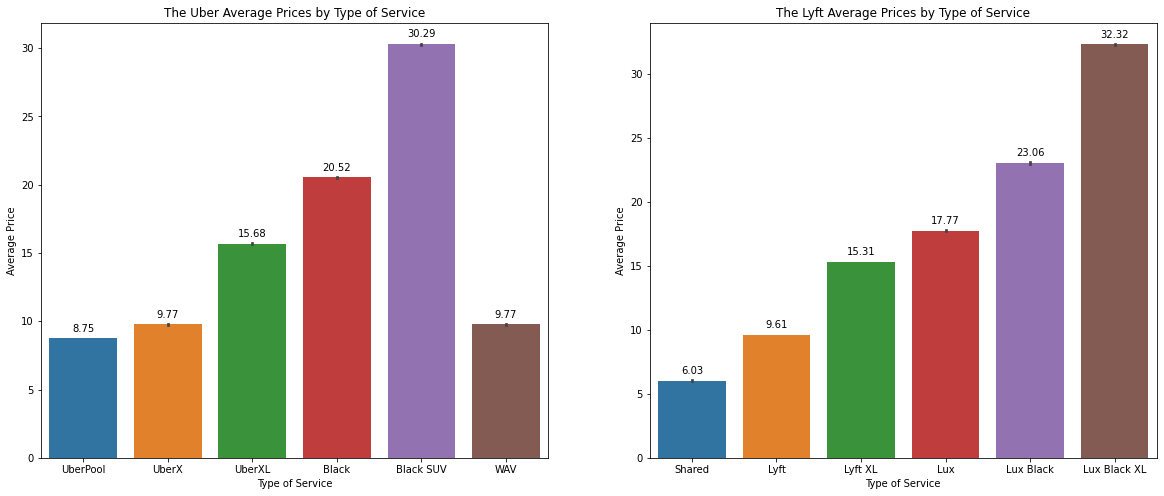

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (20,8))

ax1 = sns.barplot(x = df[df['cab_type'] == 'Uber'].name, y = df[df['cab_type'] == 'Uber'].price , ax = ax[0], order = uber_order)
ax2 = sns.barplot(x = df[df['cab_type'] == 'Lyft'].name, y = df[df['cab_type'] == 'Lyft'].price , ax = ax[1], order = lyft_order)

for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax1.set(xlabel = 'Type of Service', ylabel = 'Average Price')
ax2.set(xlabel = 'Type of Service', ylabel = 'Average Price')

ax1.set_title('The Uber Average Prices by Type of Service')
ax2.set_title('The Lyft Average Prices by Type of Service')

plt.show()

We can see that from Uber, the most expensive service is **Black SUV** and the cheapest one is **UberPool**. Whereas, the most expensive service from Lyft is **Lux Black X**L and the cheapest one is **Shared** service.




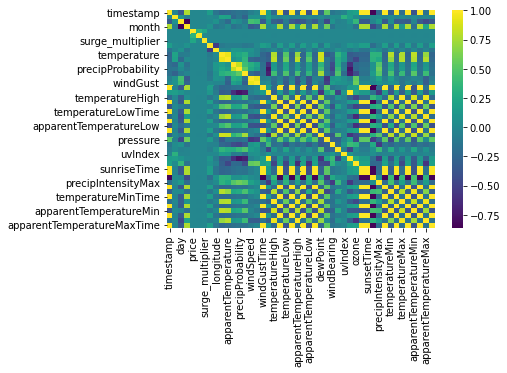

In [ ]:
sns.heatmap(df.corr(), cmap = 'viridis')

This is the correlation of all features from the dataset. The results are vary and we could not see it clearly. Let's check the correlation of each features based on price feature.

In [ ]:
corr = df.corr()
print(corr['price'].sort_values(ascending=False), '\n')

price                          1.000000
distance                       0.345061
surge_multiplier               0.240458
latitude                       0.002088
visibility                     0.001497
visibility.1                   0.001497
windGust                       0.001218
precipIntensityMax             0.001114
windSpeed                      0.000990
month                          0.000913
cloudCover                     0.000883
pressure                       0.000866
windGustTime                   0.000851
apparentTemperatureLow         0.000831
apparentTemperatureMinTime     0.000814
timestamp                      0.000808
temperatureMinTime             0.000769
temperatureMaxTime             0.000766
uvIndexTime                    0.000763
apparentTemperatureLowTime     0.000761
sunsetTime                     0.000760
sunriseTime                    0.000760
temperatureHighTime            0.000759
temperatureLowTime             0.000754
apparentTemperatureMaxTime     0.000746


The most correlated features from all features are **distance** and **surge multiplier**. It is quite obvious because those two features are affecting the price value.

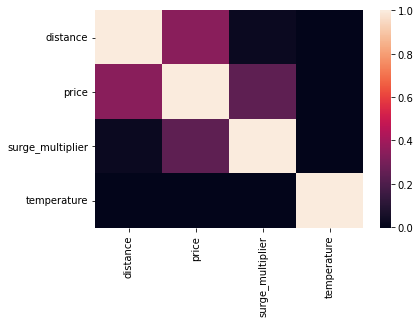

In [ ]:
df_corr = df[['distance','price','surge_multiplier','temperature']]
sns.heatmap(df_corr.corr())

From these correlation graph we can conclude that,

*   Distance and surge multipler are not correlated
*   Price and surge multiplier weakly correlated
* Price and distance are correlated



In [ ]:
df['surge_multiplier'].value_counts()

1.00    672096
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64

Check Outliers

In [ ]:
# categorical = df.dtypes[df.dtypes == object]
num = df._get_numeric_data()
num

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.544953e+09,9,16,12,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,1.543284e+09,2,27,11,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1.543367e+09,1,28,11,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,1.543554e+09,4,30,11,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,1.543463e+09,3,29,11,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,1.543708e+09,23,1,12,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,1.543708e+09,23,1,12,9.5,1.00,1.0,42.3519,-71.0643,37.05,37.05,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,1.543708e+09,23,1,12,NaN,1.00,1.0,42.3519,-71.0643,37.05,37.05,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,1.543708e+09,23,1,12,27.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [ ]:
 for k, v in num.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(num)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column timestamp outliers = 0.00%
Column hour outliers = 0.00%
Column day outliers = 0.00%
Column month outliers = 0.00%
Column price outliers = 0.81%
Column distance outliers = 1.27%
Column surge_multiplier outliers = 100.00%
Column latitude outliers = 12.78%
Column longitude outliers = 0.00%
Column temperature outliers = 5.29%
Column apparentTemperature outliers = 7.72%
Column precipIntensity outliers = 100.00%
Column precipProbability outliers = 100.00%
Column humidity outliers = 0.00%
Column windSpeed outliers = 0.00%
Column windGust outliers = 2.43%
Column windGustTime outliers = 0.00%
Column visibility outliers = 19.74%
Column temperatureHigh outliers = 23.65%
Column temperatureHighTime outliers = 0.00%
Column temperatureLow outliers = 0.00%
Column temperatureLowTime outliers = 0.00%
Column apparentTemperatureHigh outliers = 10.33%
Column apparentTemperatureHighTime outliers = 0.00%
Column apparentTemperatureLow outliers = 12.65%
Column apparentTemperatureLowTime outliers = 0.00%

#Data Preprocessing

---
In this part, we will do some of processes



1.   Select Features
2.   Split Data
3. Handling Outliers
4. Feature Encoding
5. Feature Scalling




First drop the missing value, since the missing value is inside the target data we just have to drop the whole data that has missing value

In [ ]:
df = df.dropna()

##Split Data

---

We split the dataset into **Training data by 70%** and **Test data by 30%**

In [ ]:
x = df.loc[:,['cab_type', 'name','distance', 'surge_multiplier', 'temperature', 'timestamp']]
y = df['price'] # Target

In [ ]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

In [ ]:
x_train.shape

(446583, 6)

In [ ]:
y_train.shape

(446583,)

##Handling Outliers

###Handling Outliers Train Data

In [ ]:
num_train = x_train._get_numeric_data()
for k, v in num_train.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_train)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column distance outliers = 1.07%
Column surge_multiplier outliers = 100.00%
Column temperature outliers = 5.28%
Column timestamp outliers = 0.00%


###Check Distribution for Train Data

In [ ]:
# Function to create histogram, Q-Q plot and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(x_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(x_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=x_train[variable])
    plt.title('Boxplot')

    plt.show()

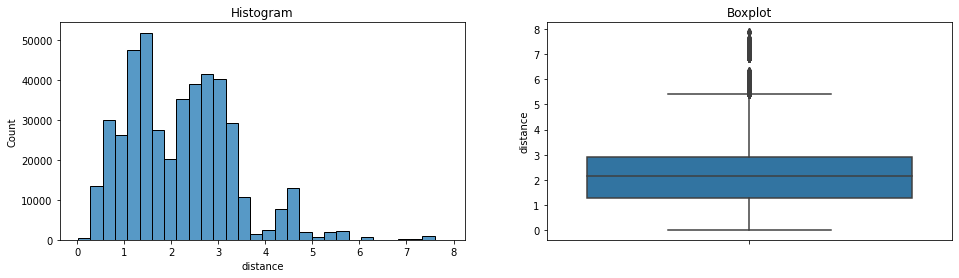


Skewness Value :  0.8115731788720086


In [ ]:
diagnostic_plots(x_train, 'distance')
print('\nSkewness Value : ', x_train['distance'].skew())

Distance feature likely has likely normal distributed 

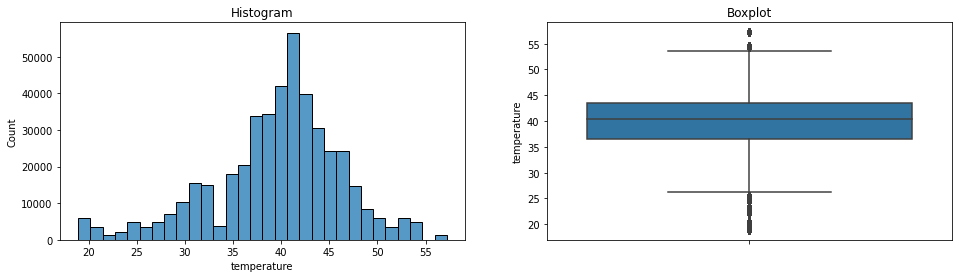


Skewness Value :  -0.6102109557404762


In [ ]:
diagnostic_plots(x_train, 'temperature')
print('\nSkewness Value : ', x_train['temperature'].skew())

Temperature also has normal distribution

In [ ]:
x_train[['distance','temperature']].describe()

,distance,temperature
count,446583.000000,446583.000000
mean,2.187749,39.584382
std,1.134431,6.723627
min,0.020000,18.910000
25%,1.270000,36.450000
50%,2.160000,40.490000
75%,2.930000,43.580000
max,7.860000,57.220000


###Capping for Train Data

In [ ]:
# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['distance','temperature'])

windsoriser.fit(x_train)

x_train = windsoriser.transform(x_train)

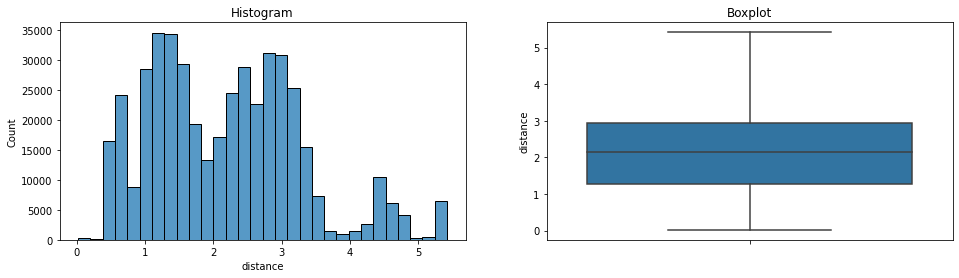


Skewness Value :  0.587036562569245


In [ ]:
diagnostic_plots(x_train, 'distance')
print('\nSkewness Value : ', x_train['distance'].skew())

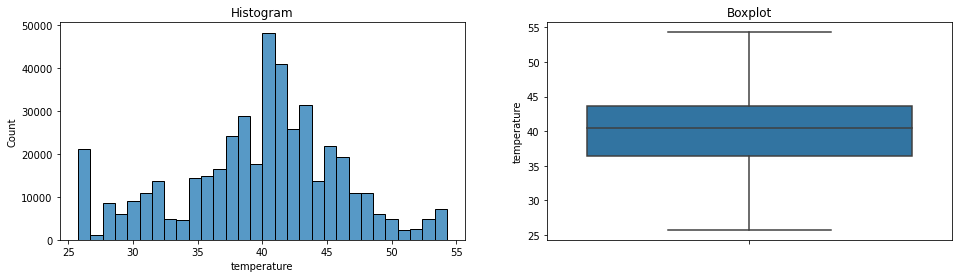


Skewness Value :  -0.3197128877437184


In [ ]:
diagnostic_plots(x_train, 'temperature')
print('\nSkewness Value : ', x_train['temperature'].skew())

###Handling Outliers for Test Data

In [ ]:
num_test = x_test._get_numeric_data()
for k, v in num_test.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_test)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column distance outliers = 1.09%
Column surge_multiplier outliers = 100.00%
Column temperature outliers = 5.32%
Column timestamp outliers = 0.00%


###Distribution for Test Data

In [ ]:
# Function to create histogram, Q-Q plot and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(x_test, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(x_test[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=x_test[variable])
    plt.title('Boxplot')

    plt.show()

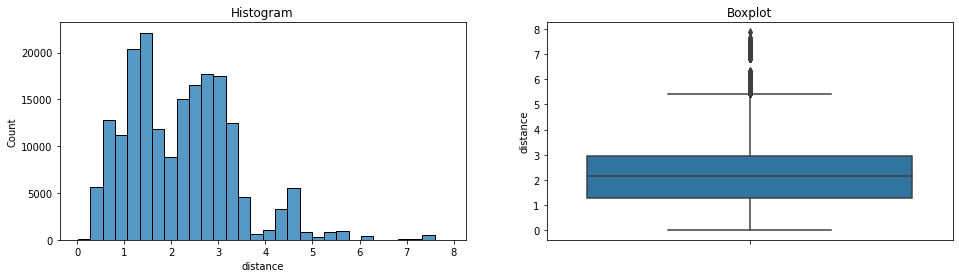


Skewness Value :  0.8290147355664192


In [ ]:
diagnostic_plots(x_test, 'distance')
print('\nSkewness Value : ', x_test['distance'].skew())

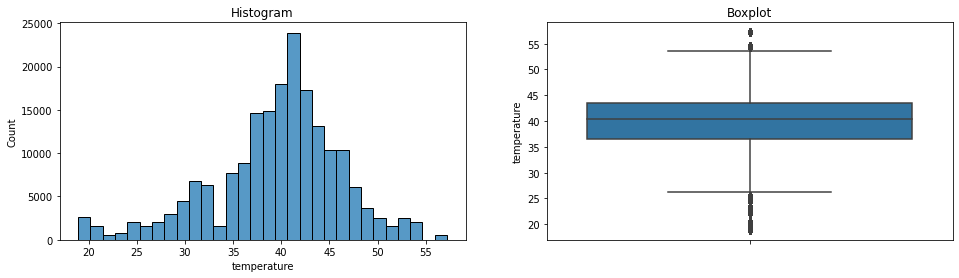


Skewness Value :  -0.6068180583664602


In [ ]:
diagnostic_plots(x_test, 'temperature')
print('\nSkewness Value : ', x_test['temperature'].skew())

###Capping for Test Data

In [ ]:
# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['distance','temperature'])

windsoriser.fit(x_test)

x_test = windsoriser.transform(x_test)

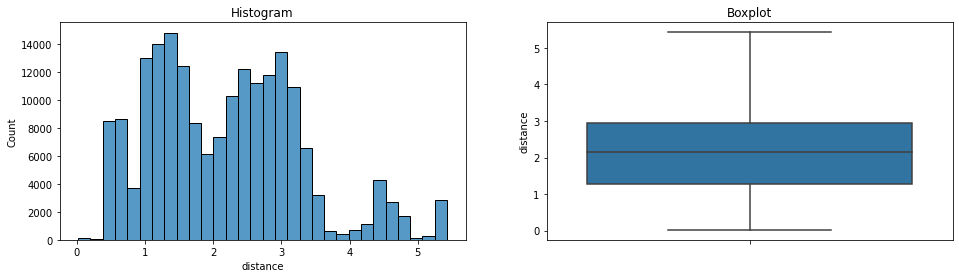


Skewness Value :  0.5929000162414952


In [ ]:
diagnostic_plots(x_test, 'distance')
print('\nSkewness Value : ', x_test['distance'].skew())

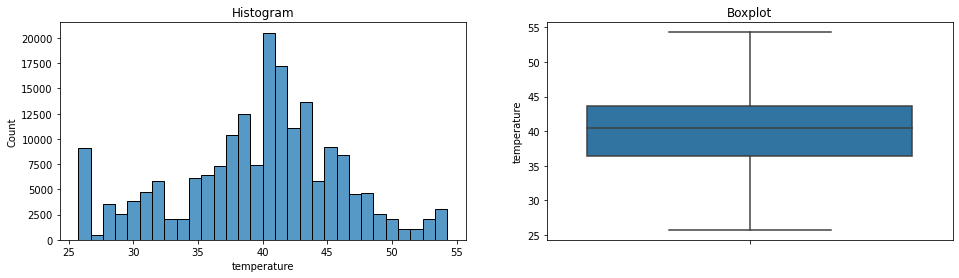


Skewness Value :  -0.3141322516960144


In [ ]:
diagnostic_plots(x_test, 'temperature')
print('\nSkewness Value : ', x_test['temperature'].skew())

##Handling Missing Value

In [ ]:
y_train.isnull().sum()

0

In [ ]:
# missing_train = y_train.isnull().index[y_train.isnull()]
# missing_test = y_train.isnull().index[y_train.isnull()]

# drop_x_train = x_train.drop(missing_train.tolist())
# drop_x_train

 ## Feature Encoding

---
We use One Hot Encoding by appling get dummies to train data and test data


In [ ]:
x_train = pd.get_dummies(x_train, prefix='', prefix_sep='', 
                            columns=['cab_type', 'name'])
x_test = pd.get_dummies(x_test, prefix='', prefix_sep='', 
                            columns=['cab_type', 'name'])


##Feature Scalling

We Use MinMaxScaler to do the scalling process

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#Define Model & Model Training

---



In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

#Model Evaluation

---

We use **R2 Score** which is the proportion of the variance in the dependent variable that is predictable from the independent variable and  **RMSE** or Root Mean Square Deviation the standard deviation of the errors which occur when a prediction is made on a dataset in this model evaluation

In [ ]:
#predicting r2 score from training data
y_pred_linear_train = lr.predict(x_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)


#predicting r2 score from test data
y_pred_linear_test = lr.predict(x_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

rmse_linear_test = np.sqrt(mean_squared_error(y_test, y_pred_linear_test))

print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear_test)

R2_score (train):  0.9276274653622328
R2_score (test):  0.9275559610883145
RMSE:  2.5030119166872526


We get **0.93** from the Train data R2 Score, which is pretty good because it is above 0.90 and also the test score is **0.93**.

#Model Inference

---

In this model inference, we use new dataset into our model or also referred to as “operationalizing a machine learning model” or “putting a machine learning model into production.” 

In this process, the new dataset we get from shuffled dataset.

###Data Loading

In [ ]:
df_shuffled = shuffle(df)
df_shuffled

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
31980,953109f5-515e-47be-91f1-40fc62709a73,1.543714e+09,1,2,12,2018-12-02 01:23:01,America/New_York,Financial District,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,7.0,1.21,1.0,42.3503,-71.0810,35.52,35.52,Clear,Light rain in the morning and overnight.,0.0000,0.00,0.82,1.85,2.37,1543672800,9.846,44.65,1543690800,34.88,1543712400,43.98,1543690800,35.53,1543712400,clear-night,30.46,1023.52,146,0.12,0,9.846,274.6,1543665335,1543698860,0.82,0.0000,1543683600,31.57,1543665600,44.65,1543690800,28.10,1543658400,43.98,1543690800
240090,8dd62023-bd6b-4755-8f37-9f2c67c1017a,1.544398e+09,23,9,12,2018-12-09 23:33:30,America/New_York,Boston University,Theatre District,Lyft,lyft,Lyft,10.5,2.99,1.0,42.3503,-71.0810,30.26,24.67,Clear,Partly cloudy throughout the day.,0.0000,0.00,0.58,5.40,6.25,1544371200,9.972,35.97,1544378400,21.91,1544443200,29.83,1544378400,19.40,1544439600,clear-night,17.19,1022.19,219,0.00,0,9.972,304.1,1544357000,1544389987,0.09,0.0003,1544374800,15.95,1544353200,35.97,1544378400,14.08,1544356800,29.83,1544378400
284465,c47ad51f-79a5-4de4-97ee-0b4531950ebc,1.543252e+09,17,26,11,2018-11-26 17:02:10,America/New_York,South Station,Back Bay,Lyft,lyft_plus,Lyft XL,19.5,3.23,1.0,42.3661,-71.0631,45.83,43.88,Overcast,"Rain until morning, starting again in the eve...",0.0010,0.12,0.88,4.22,5.17,1543287600,8.104,46.49,1543255200,41.90,1543298400,43.84,1543244400,36.70,1543298400,cloudy,42.51,1012.59,114,1.00,1,8.104,294.0,1543233003,1543266973,0.64,0.1225,1543251600,40.45,1543233600,46.49,1543255200,37.17,1543291200,43.84,1543244400
214693,2b2aca66-5ee0-45ee-9ce8-fef945fdfaad,1.545153e+09,17,18,12,2018-12-18 17:15:08,America/New_York,North Station,Northeastern University,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,12.0,3.37,1.0,42.3429,-71.1003,30.78,20.93,Clear,Mostly cloudy throughout the day.,0.0000,0.00,0.40,12.73,22.33,1545127200,10.000,32.84,1545159600,20.72,1545220800,22.96,1545159600,14.48,1545195600,clear-day,9.15,1010.60,322,0.00,1,10.000,377.1,1545135001,1545167693,0.37,0.0056,1545152400,22.98,1545192000,37.95,1545109200,12.13,1545134400,32.03,1545109200
524889,53857525-f1c4-4288-b1b8-811468395ca7,1.543708e+09,23,1,12,2018-12-01 23:42:58,America/New_York,Beacon Hill,Fenway,Lyft,lyft_premier,Lux,16.5,2.32,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.00,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305934,a996e483-4ee1-48e0-b9c4-ccda209afbc2,1.543759e+09,13,2,12,2018-12-02 13:52:57,America/New_York,Haymarket Square,Theatre District,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,16.0,1.16,1.0,42.2148,-71.0330,43.57,39.80,Light Rain,Rain throughout the day.,0.0801,1.00,0.92,6.34,7.01,1543755600,2.636,52.86,1543788000,46.60,1543824000,52.19,1543788000,47.

###Future Selection

In [ ]:
x_inf = df.loc[:, ['hour','day','month','cab_type','name','distance','surge_multiplier','temperature', 'humidity']]
y_inf = df['price'].values

In [ ]:
y_inf = y_inf.reshape(1, -1)
y_inf = y_inf.T

In [ ]:
y_inf.shape

(637976, 1)

In [ ]:
x_inf.shape

(637976, 9)

###Handling Outliers

In [ ]:
num_inf = x_inf._get_numeric_data()
for k, v in num_inf.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_inf)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column hour outliers = 0.00%
Column day outliers = 0.00%
Column month outliers = 0.00%
Column distance outliers = 1.09%
Column surge_multiplier outliers = 100.00%
Column temperature outliers = 5.29%
Column humidity outliers = 0.00%


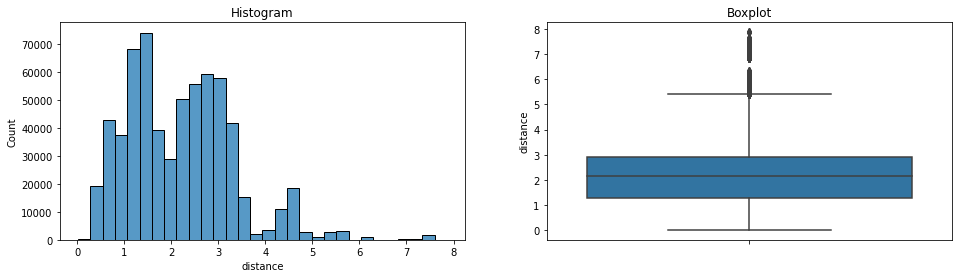


Skewness Value :  0.8168484903389348


In [ ]:
diagnostic_plots(x_inf, 'distance')
print('\nSkewness Value : ', x_inf['distance'].skew())

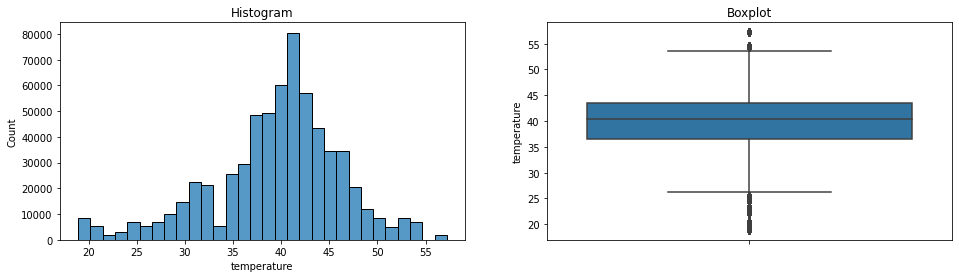


Skewness Value :  -0.6091907964028547


In [ ]:
diagnostic_plots(x_inf, 'temperature')
print('\nSkewness Value : ', x_inf['temperature'].skew())

In [ ]:
# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['distance','temperature'])

windsoriser.fit(x_inf)

x_inf = windsoriser.transform(x_inf)

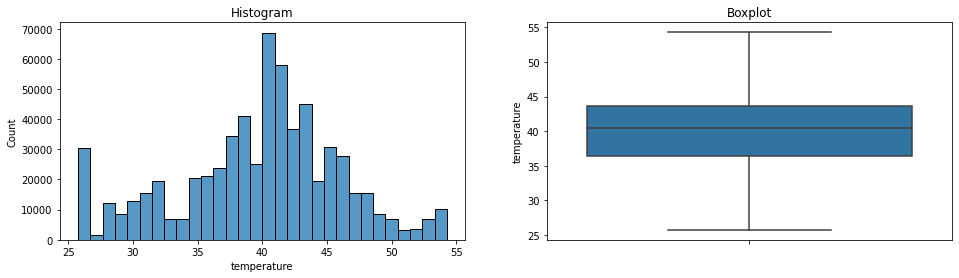


Skewness Value :  -0.318037734891617


In [ ]:
diagnostic_plots(x_inf, 'temperature')
print('\nSkewness Value : ', x_inf['temperature'].skew())

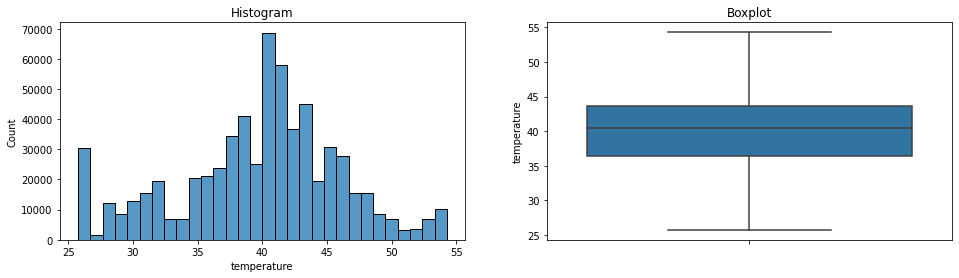


Skewness Value :  -0.318037734891617


In [ ]:
diagnostic_plots(x_inf, 'temperature')
print('\nSkewness Value : ', x_inf['temperature'].skew())

###Future Encoding

In [ ]:
x_inf = pd.get_dummies(x_inf, prefix='', prefix_sep='', 
                            columns=['cab_type', 'name'])

###Future Scalling

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_inf)
x_inf = scaler.transform(x_inf)

###Model

In [ ]:
lr = LinearRegression()
lr.fit(x_inf, y_inf)

LinearRegression()

###Prediction

In [ ]:
y_pred_linear = lr.predict(x_inf)
y_pred_linear

array([[ 1.00683594],
       [12.05664062],
       [ 3.88378906],
       ...,
       [ 6.38085938],
       [26.90039062],
       [ 5.36816406]])

These are the prediction of the target data which is price using our model.

#Conclusion

---

From Uber and Lyft Dataset, using linear regression with cab type, name, distance, surge multiplier, temperature, timestamp as features and price as the target resulting 0.93 R2 Score from both train and data test.